A primer on numerical differentiation
========================

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences:
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0 = y(x_1)-y(x_0) = y(x_0+\Delta_x)-y(x_0),\end{eqnarray}$$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [1]:
dx = 1.
x = 1.
while(dx > 1.e-10):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000019   0.1000000000000019
 1e-02   2.0100000000000007   0.0100000000000007
 1e-03   2.0009999999996975   0.0009999999996975
 1e-04   2.0000999999991720   0.0000999999991720
 1e-05   2.0000100000139298   0.0000100000139298
 1e-06   2.0000009999243669   0.0000009999243669
 1e-07   2.0000001010878061   0.0000001010878061
 1e-08   1.9999999878450576  -0.0000000121549424
 1e-09   2.0000001654807416   0.0000001654807416
 1e-10   2.0000001654807416   0.0000001654807416


Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [2]:
((1.+0.0001)*(1+0.0001)-1)

0.0002000099999999172

## Question
Repeat the above step, trying powers of 1/N, where N=2..10

In addition, one could consider the midpoint difference, defined as:
$$ dy \approx \Delta y = y(x_0+\frac{\Delta_x}{2})-y(x_0-\frac{\Delta_x}{2}).$$

For a more complex function we need to import it from math. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and midpoint differences.

In [3]:
from math import sin, sqrt, pi
dx = 1.

while(dx >1e-10):
    x = pi/4.
    d1 = sin(x+dx) - sin(x); #forward
    d2 = sin(x+dx*0.5) - sin(x-dx*0.5); # midpoint
    d1 = d1 / dx;
    d2 = d2 / dx;
    print("%6.0e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, d1-sqrt(2.)/2., d2, d2-sqrt(2.)/2.) )
    dx = dx / 2.


 1e+00   0.2699544827129282  -0.4371522984736194   0.6780100988420897  -0.0290966823444578
 5e-01   0.5048856975964859  -0.2022210835900616   0.6997640691250939  -0.0073427120614536
 2e-01   0.6118351194488110  -0.0952716617377366   0.7052667953545546  -0.0018399858319930
 1e-01   0.6611301360648314  -0.0459766451217162   0.7066465151141266  -0.0004602660724210
 6e-02   0.6845566203276618  -0.0225501608588857   0.7069916978116613  -0.0001150833748863
 3e-02   0.6959440534591224  -0.0111627277274252   0.7070780092891873  -0.0000287718973603
 2e-02   0.7015538499518499  -0.0055529312346977   0.7070995881463560  -0.0000071930401916
 8e-03   0.7043374663312676  -0.0027693148552800   0.7071049829223881  -0.0000017982641595
 4e-03   0.7057239167465070  -0.0013828644400405   0.7071063316202526  -0.0000004495662950
 2e-03   0.7064157978737740  -0.0006909833127736   0.7071066687949497  -0.0000001123915979
 1e-03   0.7067614018394579  -0.0003453793470897   0.7071067530886239  -0.0000000280979237

### Special functions in **numpy**

numpy provides a simple method **diff()** to calculate the numerical derivatives of a dataset stored in an array by forward differences. The function **gradient()** will calculate the derivatives by midpoint (or central) difference, that provides a more accurate result. 

[0 1 2 3 4 5 6 7 8 9]


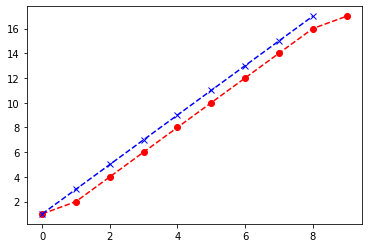

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

y = lambda x: x*x

x1 = np.arange(0,10,1)
x2 = np.arange(0,10,0.1)

y1 = np.gradient(y(x1), 1.)
print (x1)

pyplot.plot(x1,np.gradient(y(x1),1.),'r--o');
pyplot.plot(x1[:x1.size-1],np.diff(y(x1))/np.diff(x1),'b--x');  

Now try the x2 array for spacing of the differences

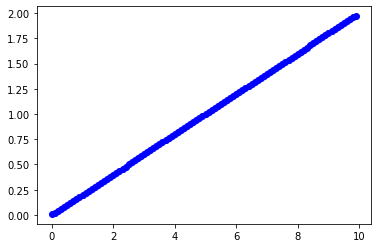

In [21]:
pyplot.plot(x2,np.gradient(y(x2),1),'b--o');

Does the plot generated by the above step look correct?  If not, what went wrong?